<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from ipywidgets import IntProgress
from IPython.display import display,HTML,clear_output
import random
import time
import math
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from uits3_krakow22.src.Event import Event
from uits3_krakow22.src.Cluster import Cluster
from uits3_krakow22.src.Track import Track
from skspatial.plotting import plot_3d
from skspatial.objects import Points, Cylinder

display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>table {float:left;}</style>"))

Welcome to JupyROOT 6.24/06


In [2]:
class Fiber:
    def __init__(self,center=[0,0,0],radius=1,height=10):
        self.center = center
        self.radius = radius
        self.height = height
    
    def getRandomPoint(self):
        R = random.random()*self.radius
        Z = (random.random()-0.5)*self.height
        phi = random.random()*2*math.pi
        coordinate = [self.center[0]+R*math.cos(phi),self.center[1]+R*math.sin(phi),self.center[2]+Z]
        return coordinate

In [3]:
dist = 0.5
origin = [[0,0,0]]
row1 = [[0,-2*dist*math.sqrt(3),0]]
row2 = [[-dist*0.5,-dist*(3*math.sqrt(3)/2),0],[dist*0.5,-dist*(3*math.sqrt(3)/2),0]]
row3 = [[-dist,-dist*math.sqrt(3),0],[0,-dist*math.sqrt(3),0],[dist,-dist*math.sqrt(3),0]]
row4 = [[-dist*1.5,-dist*math.sqrt(3)/2,0],[-dist*0.5,-dist*math.sqrt(3)/2,0],[dist*0.5,-dist*math.sqrt(3)/2,0],[dist*1.5,-dist*math.sqrt(3)/2,0]]
centers = origin + row1 + row2 + row3 + row4

for center in centers:
    center[1] = center[1] -18.75
    #center[2] = center[2] -6
print(centers)

[[0, -18.75, 0], [0, -20.48205080756888, 0], [-0.25, -20.049038105676658, 0], [0.25, -20.049038105676658, 0], [-0.5, -19.616025403784437, 0], [0, -19.616025403784437, 0], [0.5, -19.616025403784437, 0], [-0.75, -19.18301270189222, 0], [-0.25, -19.18301270189222, 0], [0.25, -19.18301270189222, 0], [0.75, -19.18301270189222, 0]]


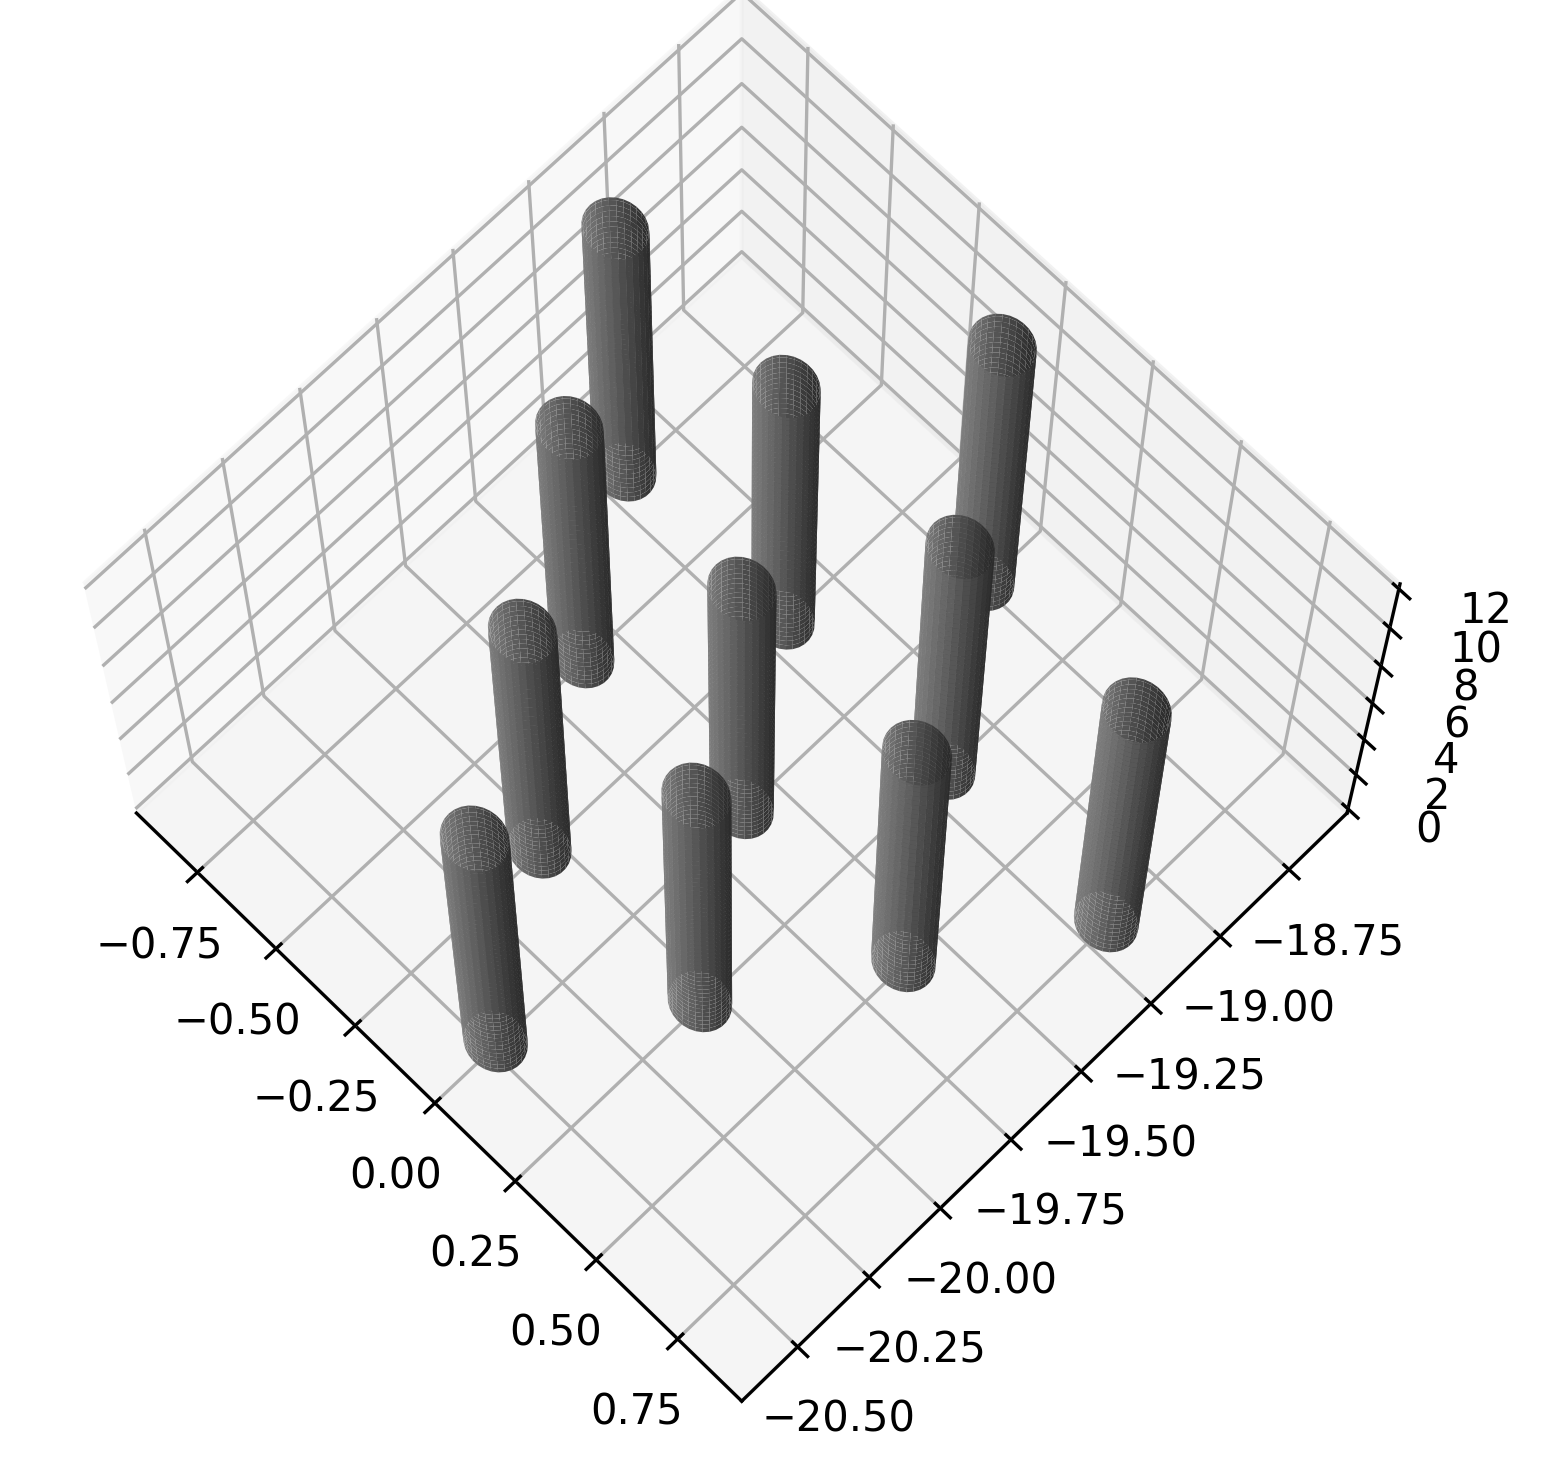

In [4]:
save = False
cylinders = [Cylinder(center,[0,0,12],0.075) for center in centers]
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')
#ax.set_proj_type('ortho')
ax.view_init(70,-45)
for target in cylinders:
    target.plot_3d(ax,color="grey",alpha=1)
    
ALPIDE_0 = Cylinder([0,12.5-7.5,0], [0, 15, 0], 30)
ALPIDE_1 = Cylinder([0,6.25-7.5,0], [0, 15, 0], 24)
ALPIDE_2 = Cylinder([0,0-7.5,0], [0, 15, 0], 18)

#ALPIDE_2.plot_3d(ax, alpha=0.5)
#ALPIDE_1.plot_3d(ax, alpha=0.5)
#ALPIDE_0.plot_3d(ax, alpha=0.5)

viewingAngles = [[0,0],[0,-90],[90,-90],[30,-55]]
if save:
    for [angle1,angle2] in viewingAngles:
        ax.view_init(angle1, angle2)
        plt.savefig("targets"+str(angle1)+"_"+str(angle2)+".png",bbox_inches='tight')

In [5]:
openingAngle = (87.08/360)*2*math.pi
fiber = Fiber(center=[0,-18.75,0],height=12,radius=0.075)
fibers = [Fiber(center=center,height=12,radius=0.075) for center in centers]
events = []
reps = 1000000
for i in range(reps):
    fiber = random.choice(fibers)
    phi = openingAngle/2
    shift = (random.random()-0.5)*0.3
    theta = (random.random()-0.5)*math.pi*0.265258238
    origin = fiber.getRandomPoint()
    #origin = [0,-18.75,0]
    trackLeft = Track(point= origin,
                      vector=[math.sin(phi+shift)*math.cos(theta), math.cos(phi+shift), math.sin(phi+shift)*math.sin(theta)])
    trackRight = Track(point=origin,
                      vector=[math.sin(-phi+shift)*math.cos(theta), math.cos(-phi+shift), math.sin(-phi+shift)*math.sin(theta)])
    event = Event(tracks=[trackLeft,trackRight])
    events.append(event)

In [17]:
plot = False
save = False
if plot:
    fig = plt.figure(figsize=(8, 6), dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(90,0)
    ax.set_proj_type('ortho')
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('z [mm]')
    ax.set_zlabel('y [mm]')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-22,-13)
    
    cylinders = [Cylinder(center,[0,0,12],0.075) for center in centers]
    for target in cylinders:
        target.plot_3d(ax,color="grey",alpha=1)

ALPIDE_0 = Cylinder([0,12.5-7.5,0], [0, 15, 0], 30)
ALPIDE_1 = Cylinder([0,6.25-7.5,0], [0, 15, 0], 24)
ALPIDE_2 = Cylinder([0,0-7.5,0], [0, 15, 0], 18)
ALPIDE_3 = Cylinder([0,12.5-7.5,0], [0, 15, 0], 30)
ALPIDE_4 = Cylinder([0,0-7.5,0], [0, 15, 0], 18)

alpidesLeft = [ALPIDE_3,ALPIDE_4]
alpidesRight = [ALPIDE_0,ALPIDE_1,ALPIDE_2]


            
#if plot:
    #ALPIDE_2.plot_3d(ax,n_along_axis=1000,n_angles=1000, alpha=0.5)
    #ALPIDE_1.plot_3d(ax, alpha=0.5)
    #ALPIDE_0.plot_3d(ax, alpha=0.5)
    
    #ALPIDE_3.plot_3d(ax, alpha=0.2)
    #ALPIDE_4.plot_3d(ax, alpha=0.2)

for event in events:
    trackRight = event.tracks[0].line
    trackLeft = event.tracks[1].line
    
    intersectionLeft = [alpide.intersect_line(trackLeft) for alpide in alpidesLeft]
    intersectionRight = [alpide.intersect_line(trackRight) for alpide in alpidesRight]
    print(intersectionLeft[0])
    for intersection in intersectionLeft+intersectionRight:
        cluster = Cluster()
        cluster.setPositionGlobal(intersection[1])
        event.addCluster(cluster)
        
    if plot:
        pointCol = {
            "ALPIDE_0" : "g",
            "ALPIDE_1" : "orange",
            "ALPIDE_2" : "b",
            "ALPIDE_3" : "b",
            "ALPIDE_4" : "g",
        }
        trackLeft.point.plot_3d(ax,s=1,c='r')
        trackLeft.plot_3d(ax,t_1 = 0, t_2 = 3,c='k',alpha=0.1,linewidth=0.3)
        trackRight.plot_3d(ax,t_1 = 0, t_2 = 3,c='k',alpha=0.1,linewidth=0.3)
    
        #for i in range(len(alpidesLeft)):
        #    clusterLeft = Cluster()
        #    clusterLeft.setPositionGlobal(intersectionLeft[i][1])
        #    if clusterLeft.isClusterIn() : 
        #        event.addCluster(clusterLeft)
        #        intersectionLeft[i][1].plot_3d(ax, s=1, c=pointCol.get(clusterLeft.detector))
        #    #else : 
        #    #    intersectionLeft[i][1].plot_3d(ax, s=10, c="b")
#
        #for i in range(len(alpidesRight)):
        #    clusterRight = Cluster()
        #    clusterRight.setPositionGlobal(intersectionRight[i][1])
        #    if clusterRight.isClusterIn() :
        #        event.addCluster(clusterRight)
        #        intersectionRight[i][1].plot_3d(ax, s=1, c=pointCol.get(clusterRight.detector))
        #    #else:
        #    #    intersectionRight[i][1].plot_3d(ax, s=10, c="b")
            
if plot and save:
    viewingAngles = [[0,0],[0,-90],[90,-90],[30,-55]]
    for [angle1,angle2] in viewingAngles:
        ax.view_init(angle1, angle2)
        plt.savefig("all_targets"+str(angle1)+"_"+str(angle2)+".png",bbox_inches='tight')

(Point([ 29.95382032, -55.20053969,  -1.66392552]), Point([-29.49814787,  15.48672952,  -5.46436385]))


TypeError: 'NoneType' object is not subscriptable

In [ ]:
intersectionLeft[0]

In [ ]:
nBins = {"x-Axis" : 1500, "y-Axis" : 750}
nRange = {"x-Axis" : 16, "y-Axis" : 8}
axis = {"x-Axis":0, "y-Axis":1}

axesComb = [["x-Axis","x-Axis"],["x-Axis","y-Axis"],["y-Axis","y-Axis"]]
#axesComb = [["x-Axis","y-Axis"]]

In [ ]:
%jsroot on
canvas = ROOT.TCanvas("myCanvas","myCanvas",1000,1000)
legend = ROOT.TLegend()

detector1 = "ALPIDE_0"
detector2 = "ALPIDE_4"

for [axis1,axis2] in axesComb:
    # Calculate histogram
    hCorr = ROOT.TH2F("Corr_"+detector1+"_"+axis1+"_"+detector2+"_"+axis2,"Correlation_"+detector1+"_"+axis1+"_"+detector2+"_"+axis2, nBins.get(axis1),-nRange.get(axis1),nRange.get(axis1),nBins.get(axis2),-nRange.get(axis2),nRange.get(axis2))
    hCorr.SetXTitle(detector1 + " - " + axis1)
    hCorr.SetYTitle(detector2 + " - " + axis2)
    for event in events:
        clustersDetector1 = event.selectDetector(detector1)
        clustersDetector2 = event.selectDetector(detector2)
        #if len(clustersDetector1) == 1 and len(clustersDetector2) == 1:
        if True:
            for cluster1 in clustersDetector1:
                if cluster1.isClusterIn():
                    for cluster2 in clustersDetector2:
                        if cluster2.isClusterIn():
                            hCorr.Fill(cluster1.localPos[axis.get(axis1)],cluster2.localPos[axis.get(axis2)])

    #Draw histogram
    hCorr.Draw("COLZ")
    #canvas.Draw()
    canvas.SaveAs("Corr_"+detector1+"_"+axis1+"_"+detector2+"_"+axis2+"_all_targets.png")